In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib

In [26]:
# Images data directories
images_dir = 'images_dtm'

# Step 1: Load the datasets and visualize

In [27]:
def load_dataset(images_dir):
    images_list = []
    path = pathlib.Path(images_dir)

    for p in path.iterdir():
        img = cv2.imread(str(p))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        name = p.stem
        images_list.append((img, name))

    return images_list

In [28]:
# loading data
images = load_dataset(images_dir)
images

[(array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [29]:
def show_img(img, cmap=None):
    test = img[0]
    name = img[1]
    plt.figure(figsize=(15, 9))
    plt.title(name)
    plt.imshow(test, cmap=cmap)
    plt.show()

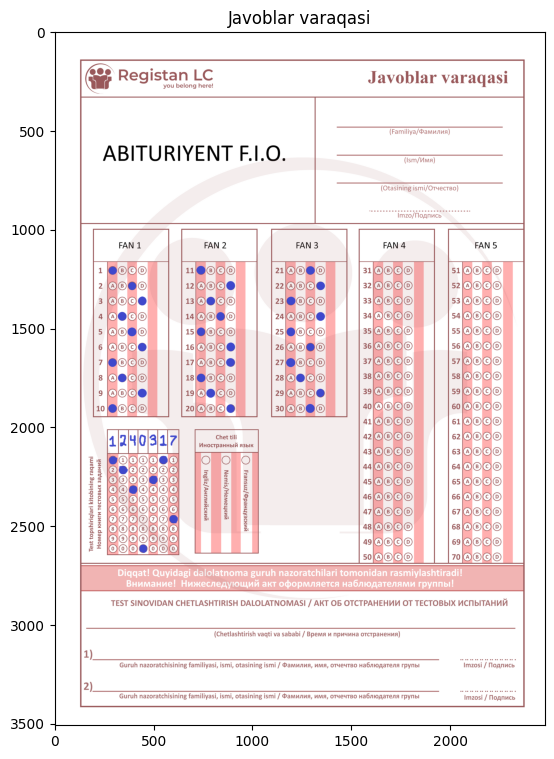

In [30]:
show_img(images[0])

# Step 2: Preprocess the data input images.

In [31]:
def threshold_img(img):
    mask = cv2.inRange(img, (50, 50, 200), (100, 100, 255))
    return mask

In [32]:
def get_id(img):
    id_img = img[2140:2635, 262:625]
    id = np.array_split(id_img, 7, axis=1)
    for i in range(len(id)):
        id[i] = np.array_split(id[i], 10, axis=0)
    return id

In [33]:
img = images[0][0]
ids = get_id(img)

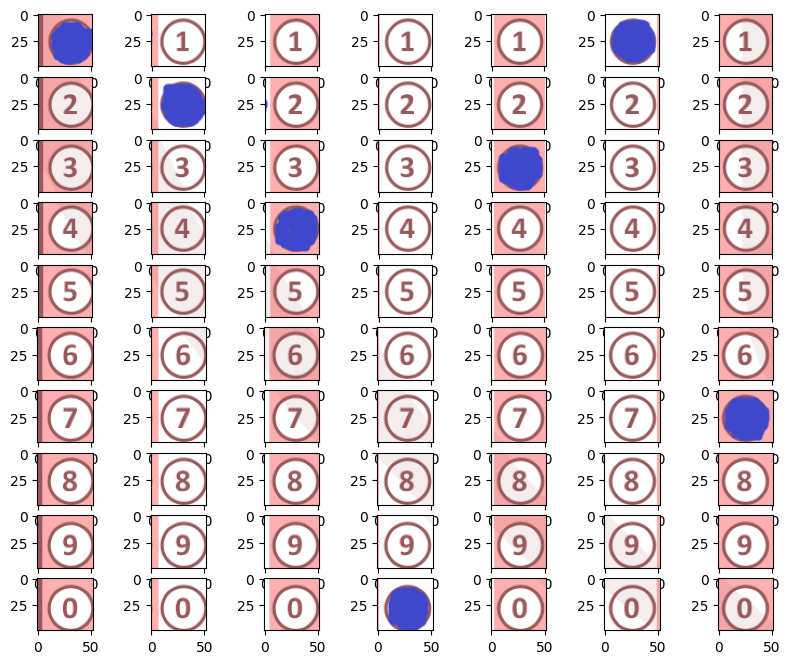

In [34]:
plt.figure(figsize=(10, 8))
for i in range(10):
    for j in range(7):
        plt.subplot(10, 7, 7 * i + j + 1)
        plt.imshow(ids[j][i])
plt.show()

In [35]:
def get_subject(img, p1, p2, block=1):
    x1, y1 = p1
    x2, y2 = p2
    subject = img[y1:y2, x1:x2]
    answers = np.array_split(subject, 10 * block)
    for i in range(10 * block):
        answers[i] = np.array_split(answers[i], 4, axis=1)
    return answers

In [36]:
subjects_pionts = [[(264, 1161), (471, 1946), 1], [(714, 1161), (916, 1946), 1], [(1164, 1161), (1371, 1946), 1],
                   [(1612, 1161), (1812, 2687), 2], [(2062, 1161), (2262, 2687), 2]]
subject_point = subjects_pionts[-1]
subject1 = get_subject(img, subject_point[0], subject_point[1], block=subject_point[2])

In [37]:
def get_all_subjects(img, subjects_pionts):
    subjects = []
    for points in subjects_pionts:
        p1, p2, block = points
        subject = get_subject(img, p1, p2, block)
        subjects.append((subject, block))
    return subjects

In [38]:
subjects = get_all_subjects(img, subjects_pionts)
len(subjects)

5

In [39]:
def preprocess(image_list):
    preprocessed_list = []
    subjects_pionts = [[(264, 1161), (471, 1946), 1], [(714, 1161), (916, 1946), 1], [(1164, 1161), (1371, 1946), 1],
                       [(1612, 1161), (1812, 2687), 2], [(2062, 1161), (2262, 2687), 2]]
    for item in image_list:
        img = item[0]
        name = item[1]
        img = threshold_img(img)
        id = get_id(img)
        subjects = get_all_subjects(img, subjects_pionts)
        preprocessed_list.append((img, subjects, id, name))

    return preprocessed_list

In [40]:
preprocessed_list = preprocess(image_list=images)

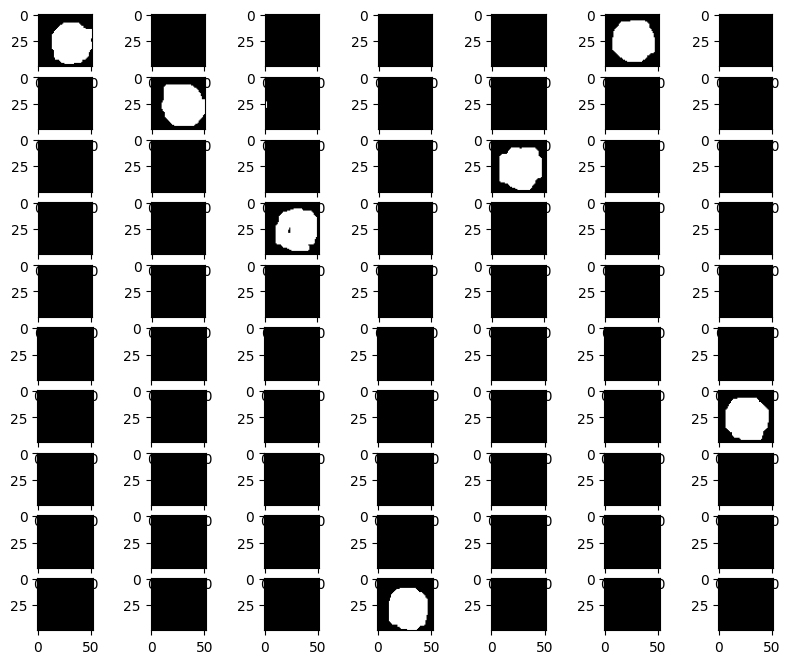

In [41]:
id_matrix = preprocessed_list[0][2]
plt.figure(figsize=(10, 8))
for i in range(10):
    for j in range(7):
        plt.subplot(10, 7, 7 * i + j + 1)
        plt.imshow(id_matrix[j][i], cmap='gray')
plt.show()

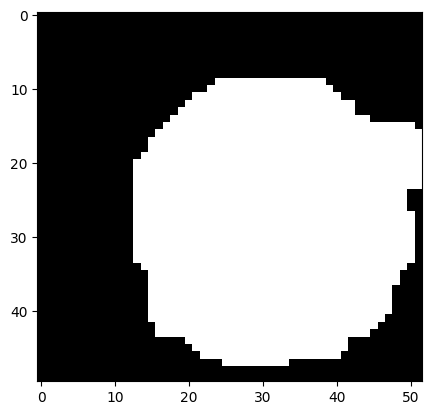

In [42]:
plt.imshow(id_matrix[0][0], cmap='gray')
plt.show()

In [43]:
id_matrix[1][1].mean(), len(id_matrix)

(132.89423076923077, 7)

In [44]:
arr = np.array(([2, 3, 1, 3]))
np.where(arr == 1)

(array([2], dtype=int64),)

In [45]:
def find_id(id_matrix):
    id_number = ""
    for id in id_matrix:
        for i in range(len(id)):
            if id[i].mean() > 75:
                if i == 9:
                    id_number += '0'
                else:
                    id_number += str(i + 1)
    return id_number


In [46]:
find_id(id_matrix)

'1240317'

In [50]:
subject, block = preprocessed_list[0][1][0]
len(subject), block, subject[0][0].mean()

(10, 1, 79.64094449853944)

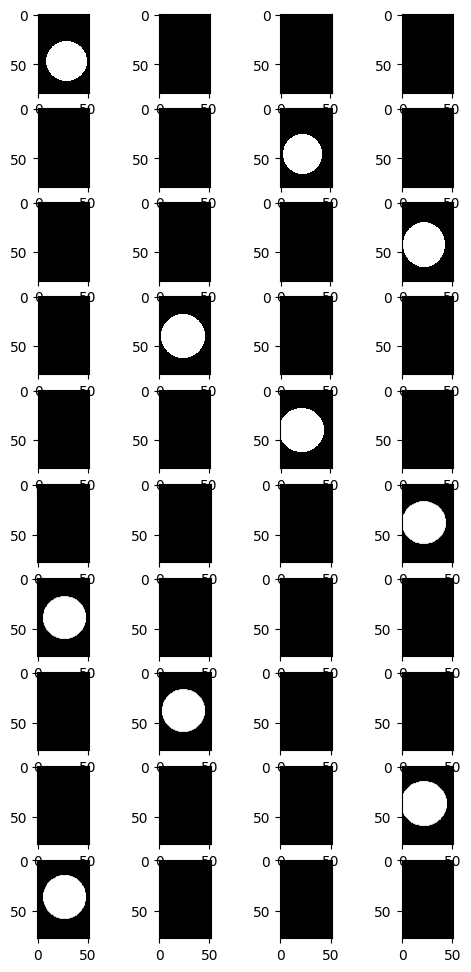

In [49]:
plt.figure(figsize=(6, 12))
for i in range(10):
    for j in range(4):
        plt.subplot(10, 4, 4 * i + j + 1)
        plt.imshow(subject[i][j], cmap='gray')

In [57]:
def find_answers(subject, block=1):
    answers = []
    variants = ['A', 'B', 'C', 'D']
    for sub in subject:
        ans = []
        for i in range(4):
            if sub[i].mean() >= 60.0:
                ans.append(variants[i])
        answers.append(ans)
    return answers
ans = find_answers(subject, block)

In [58]:
len(preprocessed_list[0])

4

In [74]:
correct_answers = [
    ['A', "B", "C", "A", "D", "C", "A", 'C', "B", "A"],
    ['A', "B", "C", "A", "D", "C", "A", 'C', "B", "A"],
    ['A', "B", "C", "A", "D", "C", "A", 'C', "B", "A"],
    ['A', "B", "C", "A", "D", "C", "A", 'C', "B", "A", 'A', "B", "C", "A", "D", "C", "A", 'C', "B", "A"],
    ['A', "B", "C", "A", "D", "C", "A", 'C', "B", "A", 'A', "B", "C", "A", "D", "C", "A", 'C', "B", "A"]
                   ]
correct_answers[0]

['A', 'B', 'C', 'A', 'D', 'C', 'A', 'C', 'B', 'A']

In [85]:
def check_answers(answers, correct_answers):
    ball = 0
    subject_ball = [1.1, 1.1, 1.1, 3.1, 3.2]
    for i in range(1):
        ball += len(answers[i][answers[i].flatten() == correct_answers[i]])*subject_ball[i]
    return ball


In [86]:
correct_answers_ = np.array(correct_answers[0])
ans = np.array(ans)
check_answers(ans, correct_answers_)

1.1

In [80]:
ans.flatten()

array(['A', 'C', 'D', 'B', 'C', 'D', 'A', 'B', 'D', 'A'], dtype='<U1')

In [82]:
ans[ans.flatten()==correct_answers_]

array([['A'],
       ['A'],
       ['A']], dtype='<U1')

In [ ]:
def main(preprocessed_list, ): # (img, subjects, id, name)
    for item in preprocessed_list:
        img = item[0]
        subjects = item[1]
        id = item[2]
        name = item[3]
